## 벡터와 행렬

In [1]:
# 벡터, 행렬 생성

import numpy as np

# 벡터
x=np.array([1,2,3])
x.__class__ #클래스 이름 표시

numpy.ndarray

In [2]:
x.shape

(3,)

In [3]:
x.ndim

1

In [4]:
# 행렬
W=np.array([[1,2,3],[4,5,6]])
W.shape

(2, 3)

In [5]:
W.ndim

2

In [6]:
#행렬의 원소별 연산

W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [7]:
W*X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [8]:
#브로드캐스트
A = np.array([[1,2],[3,4]])
A*10 # 10 = 스칼라값이 2*2 행렬로 처리 됨

array([[10, 20],
       [30, 40]])

In [9]:
A = np.array([[1,2],[3,4]])
B = np.array([[10,20]])
A*B

array([[10, 40],
       [30, 80]])

In [10]:
# 벡터의 내적(두 벡터에서 대응하는 원소들의 곱을 모두 더한 것 = 두 벡터가 얼마나 같은 방향을 향하고 있는가)
## 완전히 같은 방향 = 1 <-> 완전히 반대 방향 = -1

a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [11]:
# 행렬의 곱(왼쪽 행렬의 행벡터와 오른쪽 행렬의 열벡터의 내적)

A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

In [12]:
# 미니배치(전체 데이터를 작은 그룹으로 나눠 그룹 단위로 반복 학습)

import numpy as np
W1 = np.random.randn(2,4) # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10,2) # 입력층
h = np.matmul(x,W1)+b1 #은닉층

In [13]:
# 활성화 함수(완전연결계층에 의한 변환에 비선형 효과 = 신경망의 표현력 향상)

#sigmoid(0~1 사이 실수 출력)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
a = sigmoid(h)
a

array([[0.47127216, 0.09791476, 0.18888912, 0.50146121],
       [0.31512911, 0.06323366, 0.24605905, 0.68899507],
       [0.30778659, 0.06535777, 0.25071744, 0.6985373 ],
       [0.88730331, 0.01244952, 0.04594825, 0.05490283],
       [0.37547609, 0.14498328, 0.23770773, 0.62833564],
       [0.61847697, 0.04761741, 0.12865517, 0.31228661],
       [0.05305485, 0.36488812, 0.6013405 , 0.97223153],
       [0.08296833, 0.33646691, 0.52694746, 0.95035148],
       [0.89638931, 0.00604101, 0.03989448, 0.04689119],
       [0.23713074, 0.13380508, 0.31409097, 0.79223385]])

- 신경망 추론(문제에 대한 답을 구하는 것)

In [15]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10,2) # 입력층
W1 = np.random.randn(2,4) # 가중치(입~은)
b1 = np.random.randn(4) # 편향
W2 = np.random.randn(4,3) # 가중치(은~출)
b2 = np.random.randn(3) # 편향

h = np.matmul(x,W1)+b1 #은닉층
a = sigmoid(h)
s = np.matmul(a,W2)+b2 #출력층


In [16]:
s

array([[ 0.77575051,  0.86623818, -2.32514757],
       [ 1.38282731,  1.15124877, -1.17469433],
       [ 1.59375352,  1.08346506, -0.14154913],
       [ 0.94417732,  1.00879155, -2.33673908],
       [ 1.26084335,  1.1406089 , -1.4331102 ],
       [ 1.53347855,  0.98556581, -0.57476324],
       [ 1.40813828,  1.1730778 , -0.97064739],
       [ 0.7360743 ,  0.88937568, -2.64044146],
       [ 1.11169208,  0.97035021, -2.21391107],
       [ 0.87482861,  0.97481313, -2.66726213]])

In [17]:
# 순전파 구현

import numpy as np

#sigmoid변환
class Sigmoid:
    def __init__(self):
        self.params = [] #sigmoid 활성화함수는 활성화된 값을 출력하는 역할을 하므로 매개변수 학습 필요X

    def forward(self, x):
        return 1/(1+np.exp(-x))

#완전연결계층
class Affine:
    def __init__(self, W, b):
        self.params = [W,b]
    def forward(self,x):
        W, b = self.params
        out = np.matmul(x,W) + b
        return out

In [18]:
# TwoLayerNet 신경망 구현(affine - sigmoid - affine)

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        #가중치와 편향 초기화
        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)

        #계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        #모든 가중치를 리스트에 모은다
        self.params = []
        for layer in self.layers:
            self.params += layer.params #리스트끼리 결합하여 한 리스트로 합침
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [19]:
# 추론 실행

x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)
s

array([[2.30721506, 0.62661107, 2.45263366],
       [2.4440401 , 0.83824438, 2.14810112],
       [2.22526973, 0.97963467, 0.33704271],
       [2.32457238, 0.6925477 , 2.34090149],
       [2.41551656, 0.89225413, 1.96845447],
       [2.36489298, 0.97806193, 1.56828345],
       [2.17940363, 0.51671549, 2.46299501],
       [2.53451619, 0.79173432, 2.05379669],
       [2.43216715, 0.86318829, 2.07126655],
       [2.37002767, 0.77534912, 2.22328429]])

- 신경망 학습(최적의 매개변수 값을 찾기)

In [20]:
# repeat 노드(복제)

import numpy as np
D, N = 8,7
x = np.random.randn(1, D) # 입력
y = np.repeat(x, N, axis=0) #np.repeat = 원소 복제 / 순전파
dy = np.random.randn(N,D) # 무작위 기울기
dx = np.sum(dy, axis=0, keepdims=True) #총합 / 역전파

In [21]:
# sum 노드(덧셈)

import numpy as np
D, N = 8,7
x = np.random.randn(N, D) # 입력
y = np.sum(x, axis=0, keepdims=True) # 순전파
dy = np.random.randn(1,D) # 무작위 기울기
dx = np.repeat(dy, N, axis=0) #np.repeat = 원소 복제 / 역전파

In [22]:
# 역전파 matmul

class MatMul:
    def __init__(self, W):
        self.params = [W]  # 가중치 행렬을 params 리스트에 할당
        self.grads = [np.zeros_like(W)]  # 전달받은 array와 동일한 모양의 0으로 채워진 배열을 grads 리스트에 할당
        self.x = None  # x를 None으로 초기화

    def forward(self, x):
        W, = self.params  # params의 첫 번째 요소를 W에 할당
        out = np.matmul(x, W)  # 입력 x와 가중치 행렬 W의 행렬 곱을 계산하여 출력값 out에 저장
        self.x = x  # 입력 x를 self.x에 저장 (역전파에서 사용하기 위해)
        return out  # out을 반환

    def backward(self, dout):
        W, = self.params  # params의 첫 번째 요소인 W를 가져옴
        dx = np.matmul(dout, W.T)  # 출력에 대한 손실의 그래디언트인 dout과 W의 전치행렬의 행렬 곱을 계산하여 입력 x의 그래디언트 dx를 구함
        dW = np.matmul(self.x.T, dout)  # 입력 x의 전치행렬과 출력에 대한 손실의 그래디언트 dout의 행렬 곱을 계산하여 가중치 행렬 W의 그래디언트 dW를 구함
        self.grads[0][...] = dW  # dW를 grads 리스트의 첫 번째 요소인 self.grads[0]에 할당 (메모리 위치 고정)
        #배열이 카리키는 메모리 위치를 고정시킨 후 그 위치에 원소들을 덮어씀(깊은 복사 = 실제 데이터가 복제된다) = 즉, 값은 dW를 받지만 메모리 위치는 다름
        return dx  # dx를 반환


In [23]:
#sigmoid 계층 구현

class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
    def forward(self,x):
        out = 1 / (1+np.exp(-x))
        self.out = out
        return out
    def bacward(self,dout):
        dx = dout * (1.0-self.out) * self.out #y(1-y)
        return dx


In [24]:
# affine(완전연결계층) 구현

class Affine:
    def __init__(self, W, b):
        self.params = [W,b]
        self.grads = [np.zeros_like(W),np.zeros_like(b)]
        self.x = None
    def forward(self,x):
        W, b = self.params
        out = np.matmul(x,W) + b
        self.x = x
        return out   
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

In [25]:
# 확률적 경사하강법(SGD) = 무작위로 선택된 데이터(미니배치)에 대한 기울기 이용 -> 손실을 크게하는 방향(기울기)을 찾고 그 반대 방향으로 갱신하여 손실 최소화

class SGD:
    def __init__(self, lr=0.01): 
        self.lr = lr # 학습률

    def update(self, params, grads): #매개변수 갱신
        for i in range(len(params)):
            params[i] -= self.lr*grads[i]


x (300, 2)
t (300, 3)


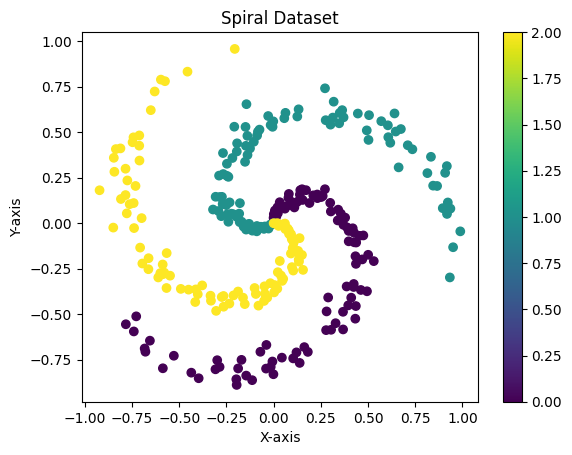

In [28]:
# 데이터 확인

import sys
sys.path.append('..')  # 부모 디렉토리의 파일을 가져올 수 있도록 설정
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)  # 입력 데이터
print('t', t.shape)  # t = 원핫벡터(정답 = 1, 오답 = 0)

# 산점도 그리기
plt.scatter(x[:, 0], x[:, 1], c=np.argmax(t, axis=1)) # t의 원-핫 인코딩에서 가장 큰 값의 인덱스를 기준으로 색을 부여
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Spiral Dataset")
plt.colorbar()
plt.show()


In [30]:
# 신경망 구현

import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        #가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I,H) # 가중치 크기를 축소하여 학습 성능 향상시킴
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H,O)
        b2 = np.zeros(O)

        #계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        #모든 가중치를 리스트에 모은다
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params #리스트끼리 결합하여 한 리스트로 합침
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x 
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
        

In [34]:
# 학습

import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from ch01.two_layer_net import TwoLayerNet

# 하이퍼파라미터 설정

max_epoch = 300 #모든 데이터셋을 학습하는 횟수 = epoch
batch_size = 30 #전체 데이터셋을 나눈 소그룹 데이터셋의 크기
hidden_size = 10
learning_rate = 1.0

# 데이터 읽기, 모델과 옵티마이저 설정

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수 정의

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx=np.random.permutation(data_size) # interger를 np.arange를 통해 array로 만들어준 값을 셔플하여 나타냄
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 기울기 구해 매개변수 갱신

        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 정기적으로 학습 경과 출력

        if (iters + 1) % 10 ==0:
            avg_loss = total_loss/loss_count
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f'
                  % (epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0,0





| 에폭 1 | 반복 10 / 10 | 손실 1.13
| 에폭 2 | 반복 10 / 10 | 손실 1.13
| 에폭 3 | 반복 10 / 10 | 손실 1.12
| 에폭 4 | 반복 10 / 10 | 손실 1.12
| 에폭 5 | 반복 10 / 10 | 손실 1.11
| 에폭 6 | 반복 10 / 10 | 손실 1.14
| 에폭 7 | 반복 10 / 10 | 손실 1.16
| 에폭 8 | 반복 10 / 10 | 손실 1.11
| 에폭 9 | 반복 10 / 10 | 손실 1.12
| 에폭 10 | 반복 10 / 10 | 손실 1.13
| 에폭 11 | 반복 10 / 10 | 손실 1.12
| 에폭 12 | 반복 10 / 10 | 손실 1.11
| 에폭 13 | 반복 10 / 10 | 손실 1.09
| 에폭 14 | 반복 10 / 10 | 손실 1.08
| 에폭 15 | 반복 10 / 10 | 손실 1.04
| 에폭 16 | 반복 10 / 10 | 손실 1.03
| 에폭 17 | 반복 10 / 10 | 손실 0.96
| 에폭 18 | 반복 10 / 10 | 손실 0.92
| 에폭 19 | 반복 10 / 10 | 손실 0.92
| 에폭 20 | 반복 10 / 10 | 손실 0.87
| 에폭 21 | 반복 10 / 10 | 손실 0.85
| 에폭 22 | 반복 10 / 10 | 손실 0.82
| 에폭 23 | 반복 10 / 10 | 손실 0.79
| 에폭 24 | 반복 10 / 10 | 손실 0.78
| 에폭 25 | 반복 10 / 10 | 손실 0.82
| 에폭 26 | 반복 10 / 10 | 손실 0.78
| 에폭 27 | 반복 10 / 10 | 손실 0.76
| 에폭 28 | 반복 10 / 10 | 손실 0.76
| 에폭 29 | 반복 10 / 10 | 손실 0.78
| 에폭 30 | 반복 10 / 10 | 손실 0.75
| 에폭 31 | 반복 10 / 10 | 손실 0.78
| 에폭 32 | 반복 10 / 10 | 손실 0.77
| 에폭 33 | 반복 10 /

100%|██████████| 300/300 [00:00<00:00, 1653.75it/s]

| 에폭 1 | 반복10/10 | 손실 1.13
| 에폭 2 | 반복10/10 | 손실 1.13
| 에폭 3 | 반복10/10 | 손실 1.12
| 에폭 4 | 반복10/10 | 손실 1.12
| 에폭 5 | 반복10/10 | 손실 1.11
| 에폭 6 | 반복10/10 | 손실 1.14
| 에폭 7 | 반복10/10 | 손실 1.16
| 에폭 8 | 반복10/10 | 손실 1.11
| 에폭 9 | 반복10/10 | 손실 1.12
| 에폭 10 | 반복10/10 | 손실 1.13
| 에폭 11 | 반복10/10 | 손실 1.12
| 에폭 12 | 반복10/10 | 손실 1.11
| 에폭 13 | 반복10/10 | 손실 1.09
| 에폭 14 | 반복10/10 | 손실 1.08
| 에폭 15 | 반복10/10 | 손실 1.04
| 에폭 16 | 반복10/10 | 손실 1.03
| 에폭 17 | 반복10/10 | 손실 0.96
| 에폭 18 | 반복10/10 | 손실 0.92
| 에폭 19 | 반복10/10 | 손실 0.92
| 에폭 20 | 반복10/10 | 손실 0.87
| 에폭 21 | 반복10/10 | 손실 0.85
| 에폭 22 | 반복10/10 | 손실 0.82
| 에폭 23 | 반복10/10 | 손실 0.79
| 에폭 24 | 반복10/10 | 손실 0.78
| 에폭 25 | 반복10/10 | 손실 0.82
| 에폭 26 | 반복10/10 | 손실 0.78
| 에폭 27 | 반복10/10 | 손실 0.76
| 에폭 28 | 반복10/10 | 손실 0.76
| 에폭 29 | 반복10/10 | 손실 0.78
| 에폭 30 | 반복10/10 | 손실 0.75
| 에폭 31 | 반복10/10 | 손실 0.78
| 에폭 32 | 반복10/10 | 손실 0.77
| 에폭 33 | 반복10/10 | 손실 0.77
| 에폭 34 | 반복10/10 | 손실 0.78
| 에폭 35 | 반복10/10 | 손실 0.75
| 에폭 36 | 반복10/10 | 손실 0.74
|

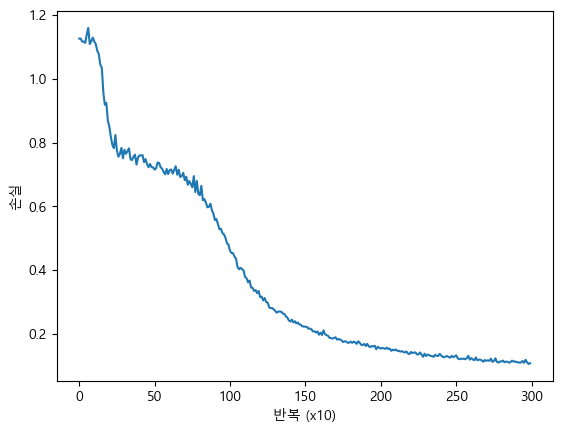

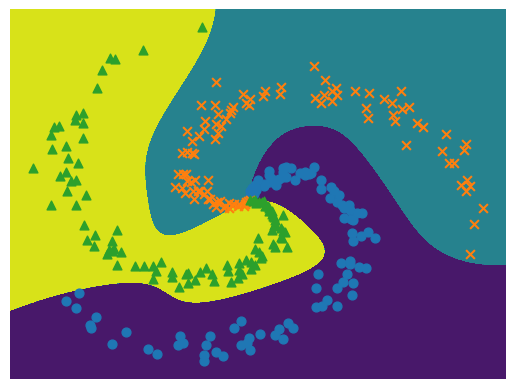

In [36]:
# ch01/train_custom_loop.py
import sys
sys.path.append('..')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm
from common.optimizer import SGD
from dataset import spiral
from two_layer_net import TwoLayerNet

matplotlib.rc('font', family='Malgun Gothic')  # linux
# matplotlib.rc('font', family='AppleGothic')  # Mac

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2,
                    hidden_size=hidden_size,
                    output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in tqdm(range(max_epoch)):
    # 3. 데이터 셔플링
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters): #데이터를 미니배치로 나누는 루프
        batch_x = x[iters*batch_size:(iters+1)*batch_size] # iters(1-epoch를 마치는데 필요한 미니배치 수) * batch_size = 전체 데이터셋 크기
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| 에폭 {epoch+1} | 반복{iters+1}/{max_iters} | 손실 {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0



# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001 #경계 영역을 그릴 때 사용할 격자 간격
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1 #0.1만큼의 여유를 두고 최소, 최대값 설정
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #격자 포인트를 생성하여 이를 활용해 모든 (x, y) 좌표에 대한 예측을 수행
X = np.c_[xx.ravel(), yy.ravel()] #다차원 배열을 1차원 배열로 펼쳐주는 함수
score = model.predict(X)
predict_cls = np.argmax(score, axis=1) #score 배열에서 각 행마다 가장 큰 값의 인덱스를 반환
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z) #예측된 경계 영역을 등고선으로 플롯
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100 #클래스당 데이터 포인트의 개수
CLS_NUM = 3 #class 개수
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i]) # s=데이터 포인트의 크기
plt.show()

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

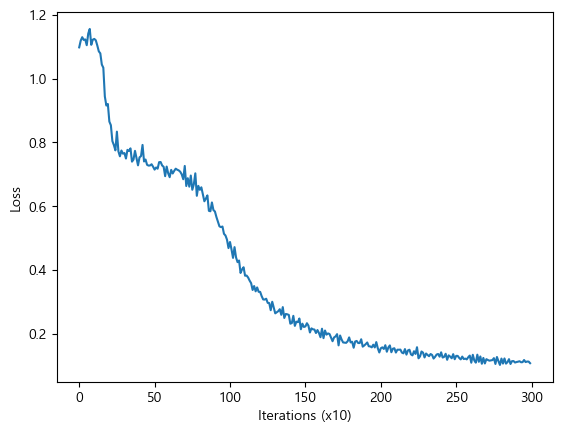

In [37]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x,t,max_epoch, batch_size, eval_interval=10)
trainer.plot()